<a href="https://colab.research.google.com/github/Pranavla/Face_mask_Detection_Using_SVM/blob/main/Mask_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
from skimage.transform import resize
from skimage.io import imread

In [ ]:
root_dir='/content/drive/MyDrive/mask_data'
target=[]
target_names=[]
flattened_img_array=[]
for i in os.listdir(root_dir):
  if os.path.isdir(os.path.join(root_dir,i)):
    for k in os.listdir(os.path.join(root_dir,i)):
      img_array=imread(os.path.join(root_dir,i,k))
      resized_image=resize(img_array,(150,150,3))
      flattened_img_array.append([resized_image.flatten(),os.listdir(root_dir).index(i),i])

In [ ]:
df=pd.DataFrame(flattened_img_array,columns=['image_array','target','target_name'])
df

,image_array,target,target_name
0,"[0.996078431372549, 0.996078431372549, 0.99607...",0,with_mask1
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,with_mask1
2,"[0.043137254901960784, 0.050980392156862744, 0...",0,with_mask1
3,"[0.8980392156862741, 0.8073616122004357, 0.605...",0,with_mask1
4,"[0.9729995642701518, 0.9847259259259252, 0.938...",0,with_mask1
...,...,...,...
97,"[0.8627450980392157, 0.8392156862745098, 0.784...",1,without_mask1
98,"[0.9934037908496731, 0.7895947712418299, 0.362...",1,without_mask1
99,"[0.6476601307189545, 0.5962222222222223, 0.596...",1,without_mask1
100,"[0.0, 0.012339869281045898, 0.0, 0.00062692810...",1,without_mask1


In [ ]:
x=df['image_array'].to_list()
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
report=classification_report(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)

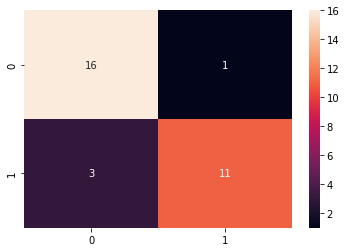

In [ ]:
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



In [ ]:
import pickle
with open('mask.pickel','wb') as file:
  pickle.dump(model,file)

In [ ]:
with open('mask.pickel','rb') as file:
  prediction_model=pickle.load(file)

In [ ]:
def detect(image_path):
  img=resize(imread(image_path),(150,150,3)).flatten()
  pred=prediction_model.predict([img])
  if pred[0]==0:
    print("Mask Detected")
  else:
    print("No Mask")


In [ ]:
detect('/content/drive/MyDrive/engin-akyurt-WBM97UGM0QA-unsplash (1).jpg')

Mask Detected


In [ ]:
detect('/content/drive/MyDrive/pexels-pixabay-220453.jpg')

No Mask
